There exist two undirected trees with n and m nodes, labeled from [0, n - 1] and [0, m - 1], respectively.

You are given two 2D integer arrays edges1 and edges2 of lengths n - 1 and m - 1, respectively, where edges1[i] = [ai, bi] indicates that there is an edge between nodes ai and bi in the first tree and edges2[i] = [ui, vi] indicates that there is an edge between nodes ui and vi in the second tree.

Node u is target to node v if the number of edges on the path from u to v is even. Note that a node is always target to itself.

Return an array of n integers answer, where answer[i] is the maximum possible number of nodes that are target to node i of the first tree if you had to connect one node from the first tree to another node in the second tree.

Note that queries are independent from each other. That is, for every query you will remove the added edge before proceeding to the next query.

 

Example 1:

Input: edges1 = [[0,1],[0,2],[2,3],[2,4]], edges2 = [[0,1],[0,2],[0,3],[2,7],[1,4],[4,5],[4,6]]

Output: [8,7,7,8,8]

Explanation:

    For i = 0, connect node 0 from the first tree to node 0 from the second tree.
    For i = 1, connect node 1 from the first tree to node 4 from the second tree.
    For i = 2, connect node 2 from the first tree to node 7 from the second tree.
    For i = 3, connect node 3 from the first tree to node 0 from the second tree.
    For i = 4, connect node 4 from the first tree to node 4 from the second tree.

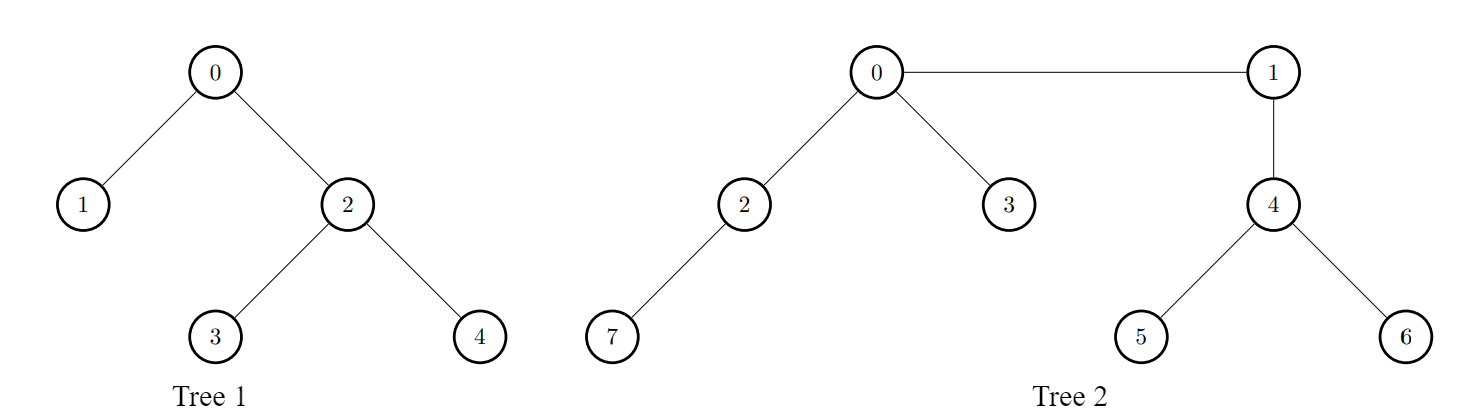

Example 2:

Input: edges1 = [[0,1],[0,2],[0,3],[0,4]], edges2 = [[0,1],[1,2],[2,3]]

Output: [3,6,6,6,6]

Explanation:

For every i, connect node i of the first tree with any node of the second tree.

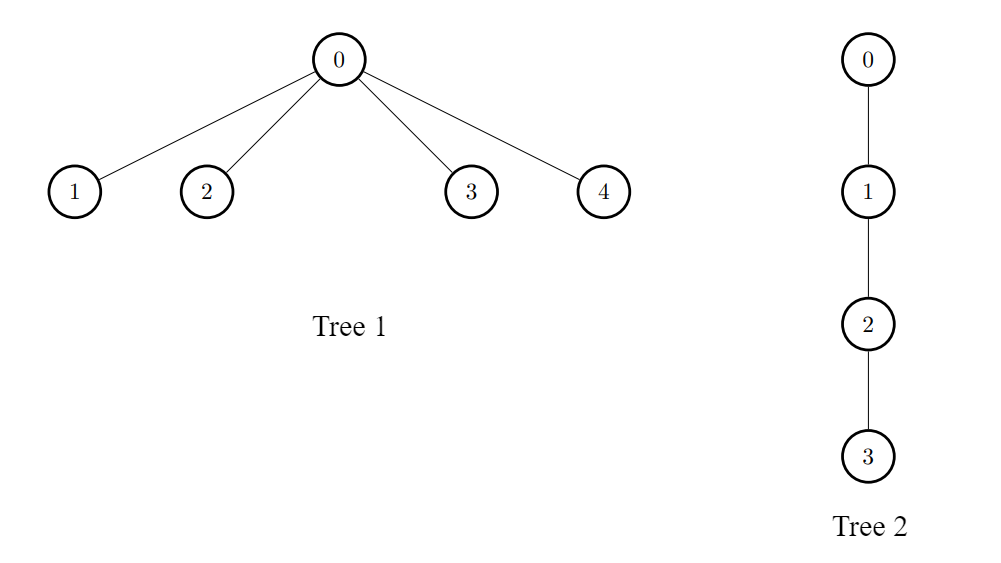

Constraints:

    2 <= n, m <= 105
    edges1.length == n - 1
    edges2.length == m - 1
    edges1[i].length == edges2[i].length == 2
    edges1[i] = [ai, bi]
    0 <= ai, bi < n
    edges2[i] = [ui, vi]
    0 <= ui, vi < m
    The input is generated such that edges1 and edges2 represent valid trees.



In [ ]:
class Solution:
    def maxTargetNodes(self, edges1: List[List[int]], edges2: List[List[int]]) -> List[int]:
        def dfs(node, parent, depth, children, color):
            res = 1 - depth % 2
            color[node] = depth % 2
            for child in children[node]:
                if child == parent:
                    continue
                res += dfs(child, node, depth + 1, children, color)
            return res

        def build(edges, color):
            n = len(edges) + 1
            children = [[] for _ in range(n)]
            for u, v in edges:
                children[u].append(v)
                children[v].append(u)
            res = dfs(0, -1, 0, children, color)
            return [res, n - res]

        n = len(edges1) + 1
        m = len(edges2) + 1
        color1 = [0] * n
        color2 = [0] * m
        count1 = build(edges1, color1)
        count2 = build(edges2, color2)
        res = [0] * n
        for i in range(n):
            res[i] = count1[color1[i]] + max(count2[0], count2[1])
        return res